In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [35]:
path='./data/credit-g.csv'
credit_df=pd.read_csv(path)
credit_df.info()
credit_df.columns=[col.strip() for col in credit_df.columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13   other_payment_plans    1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

<AxesSubplot:>

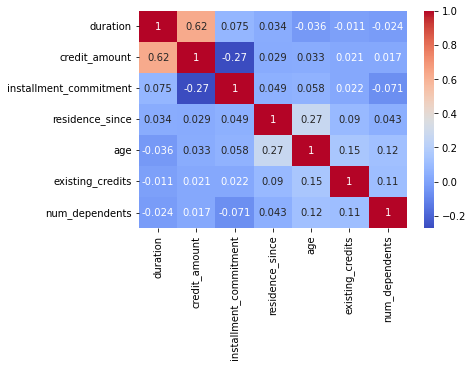

In [36]:
numerical_features=credit_df.select_dtypes(include=['float','int'])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [45]:
Categorical_Features=credit_df.select_dtypes(include=['object'])
print('Categorical Features: ',*Categorical_Features.columns,sep='\n')
Categorical_Features.drop(['class'],inplace=True,axis=1)


Categorical Features: 
purpose
savings_status
employment
personal_status
other_parties
property_magnitude
other_payment_plans
housing
job
own_telephone
foreign_worker
class


In [38]:
Ordinal_columns=['checking_status'
,'credit_history'
,'savings_status'
,'employment'
,'job'
]
Categorical_Features.drop(Ordinal_columns,inplace=True,axis=1)

Ordinal_Features=credit_df[Ordinal_columns]

In [39]:
def map_the_column(df,column,mapper):
    return df[column].map(mapper)

column='checking_status'
checking_status_map={
    'no checking': 0,
    '<0': 1,
    '0<=X<200': 2,
    '>=200': 3
}
credit_df['checking_status']=map_the_column(credit_df,column,checking_status_map)

In [40]:
credit_history_mapper = {
    'critical/other existing credit': -3,
    'existing paid': 1,
    'delayed previously': -1,
    'no credits/all paid': 3,
    'all paid': 2
}
column='credit_history'
credit_df['credit_history']=map_the_column(credit_df,column,credit_history_mapper)

In [41]:
x===1

SyntaxError: invalid syntax (Temp/ipykernel_8296/2784139477.py, line 1)

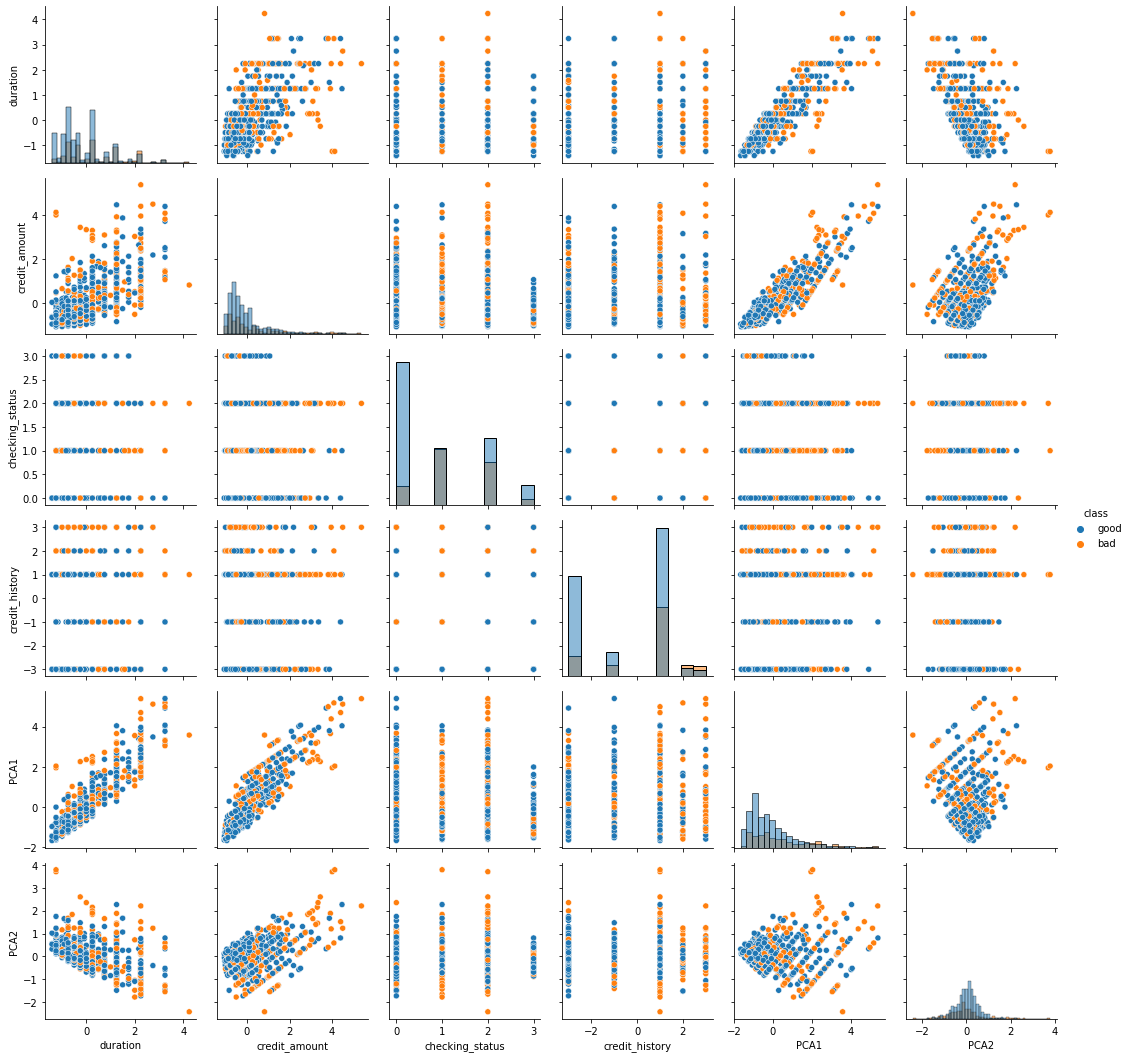

In [50]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numerical_cols = list(numerical_features.columns)[:2]
ordinal_cols = list(Ordinal_Features.columns)[:2]
target_col = 'class'

selected_cols = numerical_cols + ordinal_cols + [target_col]
selected_df = credit_df[selected_cols].copy()

selected_df[numerical_cols] = (selected_df[numerical_cols] - selected_df[numerical_cols].mean()) / selected_df[numerical_cols].std()

pca = PCA(n_components=2)
pca_components = pca.fit_transform(selected_df[numerical_cols])

selected_df['PCA1'] = pca_components[:, 0]
selected_df['PCA2'] = pca_components[:, 1]

g = sns.PairGrid(selected_df, vars=numerical_cols+ordinal_cols+['PCA1', 'PCA2'], hue=target_col)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.show()


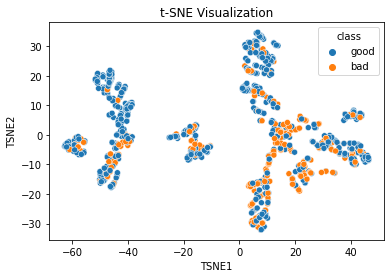

In [51]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


selected_cols = numerical_cols + ordinal_cols + [target_col]
selected_df = credit_df[selected_cols].copy()

selected_df[numerical_cols] = (selected_df[numerical_cols] - selected_df[numerical_cols].mean()) / selected_df[numerical_cols].std()

tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(selected_df[numerical_cols + ordinal_cols])

selected_df['TSNE1'] = embedded_features[:, 0]
selected_df['TSNE2'] = embedded_features[:, 1]

sns.scatterplot(data=selected_df, x='TSNE1', y='TSNE2', hue=target_col)
plt.title('t-SNE Visualization')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
lable_encoder=LabelEncoder()
credit_df['purpose'],_=pd.factorize(credit_df['purpose'])
credit_df['purpose']=lable_encoder.fit_transform(credit_df['purpose'])


In [ ]:
credit_df['savings_status'].unique()
savings_status_mapper={
    'no known savings':0, 
    '<100':1, 
    '100<=X<500':2,
    '500<=X<1000':3, 
    '>=1000':4, 
}
column='savings_status'
credit_df['savings_status']=map_the_column(credit_df,column,savings_status_mapper)

In [ ]:
credit_df['employment'].unique()
employment_map={
    '>=7':4, 
    '4<=X<7':3, 
    '1<=X<4':2, 
    '<1':1,
    'unemployed':-1 
}
column='employment'
credit_df['employment']=map_the_column(credit_df,column,employment_map)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lable_encoder=LabelEncoder()
column='personal_status'
credit_df[column],_=pd.factorize(credit_df[column])
credit_df[column]=lable_encoder.fit_transform(credit_df[column])


In [ ]:
credit_df['other_parties'].unique()
column='other_parties'
other_parties_mapper={
    'none':0, 
    'guarantor':1, 
    'co applicant':2
}
credit_df['other_parties']=map_the_column(credit_df,column,other_parties_mapper)


In [ ]:
column='property_magnitude'
property_magnitude_mapper={
    'real estate':1, 
    'life insurance':1, 
    'no known property':1, 
    'car':0
    }
credit_df[column]=map_the_column(credit_df,column,property_magnitude_mapper)


In [ ]:
credit_df['housing'].unique()
column='housing'
housing_mapper={
 'own':3, 
 'for free':2, 
 'rent' :1  
}
credit_df[column]=map_the_column(credit_df,column,housing_mapper)

In [ ]:
credit_df['job'].unique()
column='job'
job_mapper={
 'skilled':1, 
 'unskilled resident':-1, 
 'high qualif/self emp/mgmt':2,
       'unemp/unskilled non res':-2  
}
credit_df[column]=map_the_column(credit_df,column,job_mapper)

In [ ]:
credit_df[' foreign_worker'].unique()
from sklearn.preprocessing import LabelEncoder
lable_encoder=LabelEncoder()
column=' foreign_worker'
credit_df[column],_=pd.factorize(credit_df[column])
credit_df[column]=lable_encoder.fit_transform(credit_df[column])

In [ ]:
x===1

SyntaxError: invalid syntax (Temp/ipykernel_46524/2784139477.py, line 1)

In [ ]:
from sklearn.model_selection import train_test_split

# credit_df.dropna(inplace=True)
X=credit_df.drop(['class','own_telephone',' other_payment_plans','own_telephone'],axis=1)
y=credit_df['class']


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder 

# Assuming you have a DataFrame 'df' with the variables to preprocess

# Select numerical, categorical, and ordinal features
numerical_cols = list(numerical_features.columns)
categorical_cols = list(Categorical_Features.columns)
ordinal_cols = list(Ordinal_Features.columns)

# Create the preprocessing steps in the pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with the mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with the most frequent value
    ('ordinal', OrdinalEncoder())  # Convert ordinal features to numerical
])

# Combine all preprocessing steps into a single pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numerical_cols),
        ('categorical', categorical_transformer, categorical_cols),
        ('ordinal', ordinal_transformer, ordinal_cols)
    ])

# Create the final pipeline with the preprocessor and additional steps
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Add additional steps if needed (e.g., feature selection, model fitting, etc.)
])

# Fit the pipeline to your data
pipeline.fit(X_train, y_train)

# Apply the pipeline to transform your data
X_train_preprocessed = pipeline.transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# X_train.dropna(inplace=True)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy with RandomForest: ',accuracy)

from sklearn.linear_model import LogisticRegression


# Logistic Regression with Lasso regularization (L1)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)
y_pred=lasso_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy with LR and Lasso: ',accuracy)

# Logistic Regression with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2')
ridge_model.fit(X_train, y_train)
y_pred=ridge_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy with LR and Ridge: ',accuracy)

svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train,y_train)
y_pred=svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy with LR and SVM: ',accuracy)


Accuracy with RandomForest:  0.7666666666666667
Accuracy with LR and Lasso:  0.71
Accuracy with LR and Ridge:  0.6966666666666667
Accuracy with LR and SVM:  0.7133333333333334


c:\Users\Eniac\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
